**Experiment-1:**

**Network Parameters: **

learning_rate = 0.0002, batch_size = 100 , n_samples = 2459 , training_epochs = 100, dropout prob=0.3

**Connv-layer-1=== > **

Filter=16, strides=1, pool_size=2, pool stride=1, kernel = [4,4], activation = RELU

**Connv-layer-2=== > **

Filter=32 , strides=1, pool_size=2, pool stride=1, kernel = [2,2] , activation = RELU

**FC Layer-3=== >**

Num of neurons= 1024 , Weight initializer = he_normal , tivation = RELU


In [41]:
!pip install librosa

from google.colab import files

uploaded = files.upload()

Saving test_x_01.wav to test_x_01 (1).wav
Saving test_x_02.wav to test_x_02 (1).wav
Saving train_clean_male.wav to train_clean_male (1).wav
Saving train_dirty_male.wav to train_dirty_male (1).wav


In [0]:


import tensorflow as tf
tf.reset_default_graph()

import librosa

s, sr=librosa.load('train_clean_male.wav', sr=None)
S=librosa.stft(s, n_fft=1024, hop_length=512)
sn, sr=librosa.load('train_dirty_male.wav', sr=None)
X=librosa.stft(sn, n_fft=1024, hop_length=512)

import numpy as np

S_mod = np.absolute(S)
X_mod = np.absolute(X)

S_mod_transpose = S_mod.T
X_mod_transpose = X_mod.T

import tensorflow as tf

# Input placeholder 
x = tf.placeholder('float',[None, 20, 513, 1])

# Output placeholder
y = tf.placeholder('float',[None,513])


In [0]:
# 2 D Convolution

x_input_2D = tf.reshape(x,[-1,20,513,1]) 

In [5]:
# 2D Convolution with different set of parameters


# Convolution layer 1
D_2_conv_layer_1 = tf.layers.conv2d(inputs=x_input_2D, filters=16, kernel_size=[4,4], strides=1,padding='same', data_format="channels_last",kernel_initializer=tf.contrib.layers.xavier_initializer(seed=None),activation = tf.nn.relu)
print("D_2_conv_layer_1 shape:", D_2_conv_layer_1.shape)

D_2_max_pool_1 = tf.layers.max_pooling2d(inputs=D_2_conv_layer_1, pool_size=2, strides=1, padding='same')
print("D_2_max_pool_1 shape:", D_2_max_pool_1.shape)

# Convolution layer 2
D_2_conv_layer_2 = tf.layers.conv2d(inputs=D_2_max_pool_1, filters=32, kernel_size=[2,2], strides=1,padding='same', data_format="channels_last",kernel_initializer=tf.contrib.layers.xavier_initializer(seed=None),activation = tf.nn.relu)
print("D_2_conv_layer_2 shape:", D_2_conv_layer_2.shape)


D_2_max_pool_2 = tf.layers.max_pooling2d(inputs=D_2_conv_layer_2, pool_size=2, strides=1, padding='same')
print("D_2_max_pool_2 shape:", D_2_max_pool_2.shape)




For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Use keras.layers.conv2d instead.
Instructions for updating:
Colocations handled automatically by placer.
D_2_conv_layer_1 shape: (?, 20, 513, 16)
Instructions for updating:
Use keras.layers.max_pooling2d instead.
D_2_max_pool_1 shape: (?, 20, 513, 16)
D_2_conv_layer_2 shape: (?, 20, 513, 32)
D_2_max_pool_2 shape: (?, 20, 513, 32)


In [0]:
D_2_convo_2_flat = tf.reshape(D_2_max_pool_2,[-1,20*513*32]) 

In [8]:
hidden = tf.layers.dense(inputs= D_2_convo_2_flat, units=1024, activation=tf.nn.relu)

Instructions for updating:
Use keras.layers.dense instead.


In [9]:
# Dropout Probability variable

D_2_hold_prob = tf.placeholder(tf.float32)

D_2_full_one_dropout = tf.nn.dropout(hidden,keep_prob=D_2_hold_prob)

# Predictions <final dense layer, number of output classes>

D_2_pred = tf.layers.dense(D_2_full_one_dropout, 513)

# Network Parameters

learning_rate = 0.0002
batch_size = 100   # === changed batch size
n_samples = 2459
training_epochs = 78

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
import numpy as np

# Cost
loss = tf.losses.mean_squared_error(y, D_2_pred)

# Opimizer
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

# initialize session
sess = tf.InteractiveSession()

# Initialize all variabes
init = tf.global_variables_initializer()

sess.run(init)

cost_lt=[]

# loops
for epoch in range(training_epochs):
  
  # Initializing avg_cost
  avg_cost = 0.0
  
  # Total Number of batches we want to run
  total_batch = int(n_samples//batch_size)
  
  for i in range(total_batch):
    rand_ind = np.random.randint(len(X_mod_transpose),size=batch_size)
    
    batch_x =[]
    batch_y =[]
    
    for i in range(0,100):
  
      batch_xc = [X_mod_transpose[int(i):int(i)+20,:]]
      (batch_x.append(batch_xc))
      
      arr_batch_x = np.array(batch_x)
      
      #print("arr_batch_x:", np.array(arr_batch_x).shape)
      
      o = arr_batch_x.transpose(0,2,3,1)
      
      #print("0:", o.shape)
      
      batch_yc = [S_mod_transpose[int(i):int(i)+20,:]]
      np.array(batch_y.append(batch_yc))

      batch_yy = S_mod_transpose[rand_ind]

    # Interested in only the second parameter COST
    _, c = sess.run([optimizer, loss], feed_dict={x:np.array(o), y:np.array(batch_yy),D_2_hold_prob:0.3})

    avg_cost += c/total_batch
    
  print("Epoch: {} cost is {:.4f} ".format(epoch+1, avg_cost))
  cost_lt.append(avg_cost)
  
print("\nModel has completed {} epochs of training".format(training_epochs))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch: 1 cost is 0.1097 
Epoch: 2 cost is 0.0972 
Epoch: 3 cost is 0.0968 
Epoch: 4 cost is 0.0961 
Epoch: 5 cost is 0.0921 
Epoch: 6 cost is 0.0910 
Epoch: 7 cost is 0.0962 
Epoch: 8 cost is 0.0966 
Epoch: 9 cost is 0.0873 
Epoch: 10 cost is 0.1031 
Epoch: 11 cost is 0.1027 
Epoch: 12 cost is 0.0957 
Epoch: 13 cost is 0.0916 
Epoch: 14 cost is 0.0996 
Epoch: 15 cost is 0.0872 
Epoch: 16 cost is 0.0932 
Epoch: 17 cost is 0.0960 
Epoch: 18 cost is 0.0897 
Epoch: 19 cost is 0.1106 
Epoch: 20 cost is 0.1022 
Epoch: 21 cost is 0.0922 
Epoch: 22 cost is 0.0959 
Epoch: 23 cost is 0.0919 
Epoch: 24 cost is 0.0846 
Epoch: 25 cost is 0.0941 
Epoch: 26 cost is 0.0988 
Epoch: 27 cost is 0.0822 
Epoch: 28 cost is 0.0863 
Epoch: 29 cost is 0.0877 
Epoch: 30 cost is 0.0874 
Epoch: 31 cost is 0.0787 
Epoch: 32 cost is 0.0906 
Epoch: 33 cost is 0.0938 
Epoch: 34 cost is 0.0863 
Epoch: 35 cost is 0.0941 
Epoch: 36 cost is 0.0904 
Epoch: 37 cost is 0.0912 
Epoch: 38 cost is 0.0801 
Epoch: 39 cost is 0.0

In [10]:
D_2_pred

<tf.Tensor 'dense_1/BiasAdd:0' shape=(?, 513) dtype=float32>

In [11]:
x

<tf.Tensor 'Placeholder:0' shape=(?, 1, 20, 513) dtype=float32>

In [12]:
y

<tf.Tensor 'Placeholder_1:0' shape=(?, 513) dtype=float32>

In [20]:
D_2_full_one_dropout

<tf.Tensor 'dropout/mul:0' shape=(?, 1024) dtype=float32>

In [21]:
D_2_max_pool_2

<tf.Tensor 'max_pooling2d_1/MaxPool:0' shape=(?, 32, 20, 513) dtype=float32>

In [10]:
# Reran the experiment with Less number of iterations as the program was taking alot of time to finish.


import numpy as np

# Cost
loss = tf.losses.mean_squared_error(y, D_2_pred)

# Opimizer
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

# initialize session
sess = tf.InteractiveSession()

# Initialize all variabes
init = tf.global_variables_initializer()

sess.run(init)

cost_lt=[]

# loops
for epoch in range(training_epochs):
  
  # Initializing avg_cost
  avg_cost = 0.0
  
  # Total Number of batches we want to run
  total_batch = int(n_samples//batch_size)
  
  for i in range(total_batch):
    rand_ind = np.random.randint(len(X_mod_transpose),size=batch_size)
    
    batch_x =[]
    batch_y =[]
    
    # Creating a bacth with the required shape
    for i in range(0,100):
  
      batch_xc = [X_mod_transpose[int(i):int(i)+20,:]]
      (batch_x.append(batch_xc))
      
    arr_batch_x = np.array(batch_x)
      
    #print("arr_batch_x:", np.array(arr_batch_x).shape)
    
    # Transposing the batch data set so that it matches with the input Tensor Shape
    o = arr_batch_x.transpose(0,2,3,1)
      
    #print("0:", o.shape)
      
    batch_yc = [S_mod_transpose[int(i):int(i)+20,:]]
    np.array(batch_y.append(batch_yc))

    batch_yy = S_mod_transpose[rand_ind]

    # Interested in only the second parameter COST
    _, c = sess.run([optimizer, loss], feed_dict={x:np.array(o), y:np.array(batch_yy),D_2_hold_prob:0.3})

    avg_cost += c/total_batch
    
  print("Epoch: {} cost is {:.4f} ".format(epoch+1, avg_cost))
  cost_lt.append(avg_cost)
  
print("\nModel has completed {} epochs of training".format(training_epochs))

Instructions for updating:
Use tf.cast instead.
Epoch: 1 cost is 0.1279 
Epoch: 2 cost is 0.0932 
Epoch: 3 cost is 0.1075 
Epoch: 4 cost is 0.0991 
Epoch: 5 cost is 0.0967 
Epoch: 6 cost is 0.1054 
Epoch: 7 cost is 0.1014 
Epoch: 8 cost is 0.0943 
Epoch: 9 cost is 0.1027 
Epoch: 10 cost is 0.0913 
Epoch: 11 cost is 0.0926 
Epoch: 12 cost is 0.0890 
Epoch: 13 cost is 0.1048 
Epoch: 14 cost is 0.1077 
Epoch: 15 cost is 0.0896 
Epoch: 16 cost is 0.0904 
Epoch: 17 cost is 0.0845 
Epoch: 18 cost is 0.0953 
Epoch: 19 cost is 0.0908 
Epoch: 20 cost is 0.0792 
Epoch: 21 cost is 0.0935 
Epoch: 22 cost is 0.0946 
Epoch: 23 cost is 0.0922 
Epoch: 24 cost is 0.0922 
Epoch: 25 cost is 0.0936 
Epoch: 26 cost is 0.0983 
Epoch: 27 cost is 0.0886 
Epoch: 28 cost is 0.0869 
Epoch: 29 cost is 0.0927 
Epoch: 30 cost is 0.0912 
Epoch: 31 cost is 0.1032 
Epoch: 32 cost is 0.0853 
Epoch: 33 cost is 0.0812 
Epoch: 34 cost is 0.0830 
Epoch: 35 cost is 0.0934 
Epoch: 36 cost is 0.0865 
Epoch: 37 cost is 0.0934 

Text(0, 0.5, 'loss')

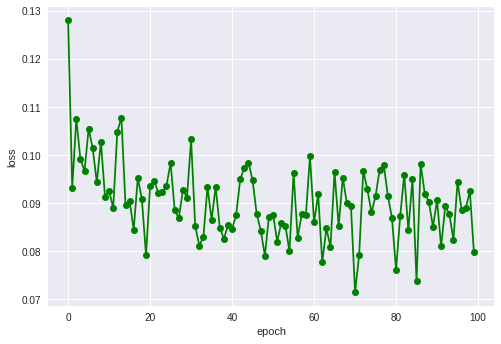

In [11]:
index = [i for i in  range(training_epochs)]

import matplotlib.pyplot as plt
plt.plot(index,cost_lt,'go-')
plt.xlabel('epoch')
plt.ylabel('loss')

In [0]:
## Testing the test file with Experiment-2 trained model

x_test, sr_test=librosa.load('test_x_01.wav', sr=None)
X_test = librosa.stft(x_test, n_fft=1024, hop_length=512)


In [14]:
x_test.shape

(72619,)

In [18]:
X_test_mod = np.absolute(X_test)
X_test_mod_transpose = X_test_mod.T

X_test_mod_transpose.shape


(142, 513)

In [28]:
    
  batch_test_x =[]
   
  # Running the loop for 0 to 1234 as not cosidering the last 19 records/ data points. Because after 123 iteration, it will keep on reducing the frame 
  # size because everytime i am selecting 20 plus rows from the current Value of "i".
  
  
    # Creating a bacth with the required shape
    for i in range(0,123):
  
      batch_test_xc = [X_test_mod_transpose[int(i):int(i)+20,:]]
      print("shape","i:",i, np.array(batch_test_xc).shape)
      (batch_test_x.append(batch_test_xc))
      
    arr_test_batch_x = np.array(batch_test_x)

shape i: 0 (1, 20, 513)
shape i: 1 (1, 20, 513)
shape i: 2 (1, 20, 513)
shape i: 3 (1, 20, 513)
shape i: 4 (1, 20, 513)
shape i: 5 (1, 20, 513)
shape i: 6 (1, 20, 513)
shape i: 7 (1, 20, 513)
shape i: 8 (1, 20, 513)
shape i: 9 (1, 20, 513)
shape i: 10 (1, 20, 513)
shape i: 11 (1, 20, 513)
shape i: 12 (1, 20, 513)
shape i: 13 (1, 20, 513)
shape i: 14 (1, 20, 513)
shape i: 15 (1, 20, 513)
shape i: 16 (1, 20, 513)
shape i: 17 (1, 20, 513)
shape i: 18 (1, 20, 513)
shape i: 19 (1, 20, 513)
shape i: 20 (1, 20, 513)
shape i: 21 (1, 20, 513)
shape i: 22 (1, 20, 513)
shape i: 23 (1, 20, 513)
shape i: 24 (1, 20, 513)
shape i: 25 (1, 20, 513)
shape i: 26 (1, 20, 513)
shape i: 27 (1, 20, 513)
shape i: 28 (1, 20, 513)
shape i: 29 (1, 20, 513)
shape i: 30 (1, 20, 513)
shape i: 31 (1, 20, 513)
shape i: 32 (1, 20, 513)
shape i: 33 (1, 20, 513)
shape i: 34 (1, 20, 513)
shape i: 35 (1, 20, 513)
shape i: 36 (1, 20, 513)
shape i: 37 (1, 20, 513)
shape i: 38 (1, 20, 513)
shape i: 39 (1, 20, 513)
shape i: 4

In [30]:
arr_test_batch_x.shape

(123, 1, 20, 513)

In [0]:

o = arr_test_batch_x.transpose(0,2,3,1)


In [34]:
o.shape

(123, 20, 513, 1)

In [0]:

X_hat_test = sess.run(D_2_pred, feed_dict={x: o ,D_2_hold_prob:1.0})


In [0]:
# Neglecting the last 19 entries as the same i didn't consider while reshaping test input

X_hat_intermediate = (X_test/X_test_mod)
X_hat = np.multiply(X_hat_intermediate[:,:123],X_hat_test.T)
X_hat_recon = librosa.istft(X_hat,  hop_length=512, win_length=1024) 
librosa.output.write_wav('ass2_q2_test_s_01_recons_exp2.wav', X_hat_recon, sr_test)

In [38]:
X_hat_recon.shape

(62464,)

In [40]:
# snr start 
num = np.sum(X_test.astype(float))** 2
print(num)

den = np.sum(np.subtract(x_test.astype(float)[:62464] , X_hat_recon.astype(float)) ** 2)
print(den)

snr = num/den

import math 
print(10 * math.log10((snr)))



0.6199765115364817
48.50128499485604
-18.933780088631234


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  """Entry point for launching an IPython kernel.


In [0]:
# output file download

from google.colab import files

with open('ass2_q2_test_s_01_recons_exp2.wav', 'w') as f:
  f.write('ass2_q2_test_s_01_recons_exp2.wav')

files.download('ass2_q2_test_s_01_recons_exp2.wav')